In [293]:
#import libraries
library(stats)
library(circular)
library(ggplot2)
library(dplyr)

In [294]:
#import data from csv (csv needs to be uploaded on "home" page)
datamp = read.csv("alignment_analysis3.csv")


In [295]:
#Check dimensions of imported data and column names
dim(datamp)
names(datamp)

[1] 180   5

[1] "ï..Angle" "X9_nw"    "X0_mw"    "X20_mw"   "test"

In [296]:
## Rename Columnes because they came out weird and don't want to figure out that formatting right now
names(datamp)[names(datamp) == "ï..Angle"] <- "Angle"
names(datamp)[names(datamp) == "X9_nw"] <- "nine"
names(datamp)[names(datamp) == "X0_mw"] <- "zero"
names(datamp)[names(datamp) == "X20_mw"] <- "twenty"
names(datamp)[names(datamp) == "test"] <- "test"

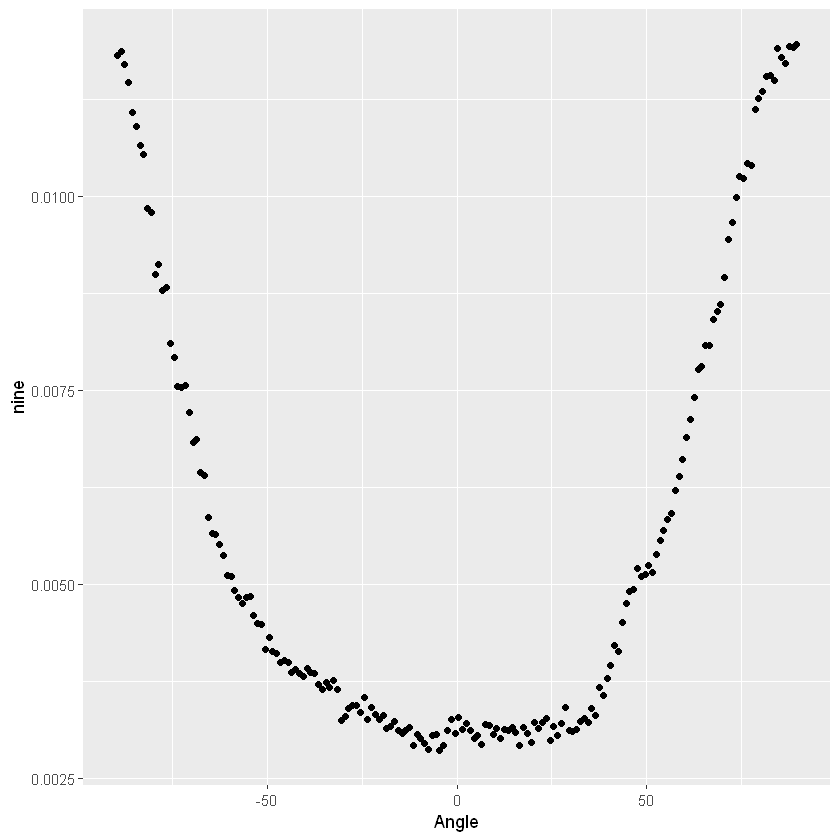

In [304]:
#visualize imported data with plot to make sure it looks ok
ggplot(data= datamp, aes(x = Angle, y = nine)) +
  geom_point()

In [299]:
#Put data into format for making circular and statistical tests
DT <- matrix(c(datamp$Angle,datamp$nine),ncol=2,byrow=FALSE)
AB <- matrix(c(datamp$Angle,datamp$zero),ncol=2,byrow=FALSE)
CD <- matrix(c(datamp$Angle,datamp$twenty),ncol=2,byrow=FALSE)
EF <- matrix(c(datamp$Angle,datamp$test),ncol=2,byrow=FALSE)

In [300]:
#make data circular (I think this is the von mises formulation you were talking about )
Nine_mw <- circular(DT, units="degrees", template="geographics") #assign north subset to "north" variable
Zero_mw <- circular(AB, units="degrees", template="geographics") #south 
Twenty_mw  <- circular(CD, units="degrees", template="geographics") #south 
TEST <-circular(EF, units="degrees", template="geographics") #south 

In [306]:
#watson two test because I can't get the other one to work yet
#actual data
watson.two.test(Twenty_mw,Zero_mw)
watson.two.test(Nine_mw,Zero_mw)
watson.two.test(Twenty_mw,Nine_mw)

#test data to make sure this is working the way I think it is 
# if p value is < 0.05 should be statistically different/significant, >0.05 not statistically significant/different
watson.two.test(Zero_mw,TEST) #test is a fake set that should definitely be statistically significant 
watson.two.test(Zero_mw,Zero_mw) #testing should not be statistically significant because they are the same 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.8963 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.3541 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 1.0563 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 4.5952 
P-value < 0.001 
 


      Watson's Two-Sample Test of Homogeneity 

Test Statistic: 4e-04 
P-value > 0.10 
 

In [309]:
#this is still not working will figure out later
# got it to work with the example so there is something I am formatting wrong with my inputs 
watson.williams.test(Angle, north) #tried a lot of combos of my current data, some output stuff but didn't analyze it correctly (ie, thought angles were groups)


ERROR: Error in watson.williams.test(Angle, north): object 'Angle' not found


In [310]:
#watson william test sample that works in case you are interested

#because this works I have all the dependencies I need and there isn't anything wrong with the code- just something wrong with my inputs 

# Ant orientation from Duelli and Wehner (1973)
# Example used in Batschelet (1981)
data <- list(
  exp = circular(rep(c(-20, -10, 0), c(1,7,2)), 
        units="degrees", template="geographics"),
  control = circular(rep(c(-10, 0, 10, 20), c(3,3,3,1)), 
            units="degrees", template="geographics")
)

watson.williams.test(data)



	Watson-Williams test for homogeneity of means

data:  exp and control
F = 8.7329, df1 = 1, df2 = 18, p-value = 0.008472
sample estimates:
Circular Data: 
Type = angles 
Units = degrees 
Template = geographics 
Modulo = asis 
Zero = 1.570796 
Rotation = clock 
mean of control     mean of exp 
       1.988969       -9.000615 
